In [1]:
import pandas as pd
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from xgboost import XGBClassifier
from scripts.modeling import Modeler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [2]:
df = pd.read_csv("../data/AdSmartABdata.csv")
analyzer = Modeler(df)
numeric_pipeline = analyzer.generate_pipeline("numeric")
numeric_transformation =  analyzer.generate_transformation(numeric_pipeline,"numeric","number")
numerical_features = analyzer.store_features("numeric","number")
categorical_features = analyzer.store_features("categorical","number")

In [3]:
analyzer.model(RandomForestClassifier,n_estimators=100)

(array([[742,  10],
        [ 55,   1]], dtype=int64),
 0.9195544554455446)

In [4]:
analyzer.model( DecisionTreeClassifier)

(array([[681,  71],
        [ 54,   2]], dtype=int64),
 0.8452970297029703)

In [5]:
analyzer.model(LogisticRegression)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(array([[752,   0],
        [ 56,   0]], dtype=int64),
 0.9306930693069307)

In [6]:
analyzer.model(BernoulliNB)

(array([[752,   0],
        [ 56,   0]], dtype=int64),
 0.9306930693069307)

In [7]:
analyzer.model(GaussianNB)

(array([[602, 150],
        [ 42,  14]], dtype=int64),
 0.7623762376237624)

In [8]:
analyzer.model(KNeighborsClassifier,n_neighbors=3, metric="minkowski")

(array([[736,  16],
        [ 55,   1]], dtype=int64),
 0.9121287128712872)

In [9]:
analyzer.model(XGBClassifier,n_estimators=1000, learning_rate=0.05)

(array([[750,   2],
        [ 55,   1]], dtype=int64),
 0.9294554455445545)

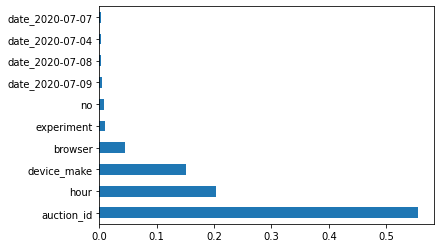

hour               0.204122
platform_os        0.002761
no                 0.007931
date_2020-07-03    0.002937
date_2020-07-04    0.003003
date_2020-07-05    0.002450
date_2020-07-06    0.002501
date_2020-07-07    0.002938
date_2020-07-08    0.003079
date_2020-07-09    0.003955
date_2020-07-10    0.002874
auction_id         0.556086
experiment         0.009359
device_make        0.151493
browser            0.044512
dtype: float64

In [10]:
analyzer.feature_importance()